<a href="https://colab.research.google.com/github/snow-white2024/AIFFEL_quest_cr/blob/master/MainQuest/Quest02/Main_Quest_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#메인퀘스트 02

[의사결정나무를 이용해 전설의 포켓몬스터 찾아내기!] 241230 백승호

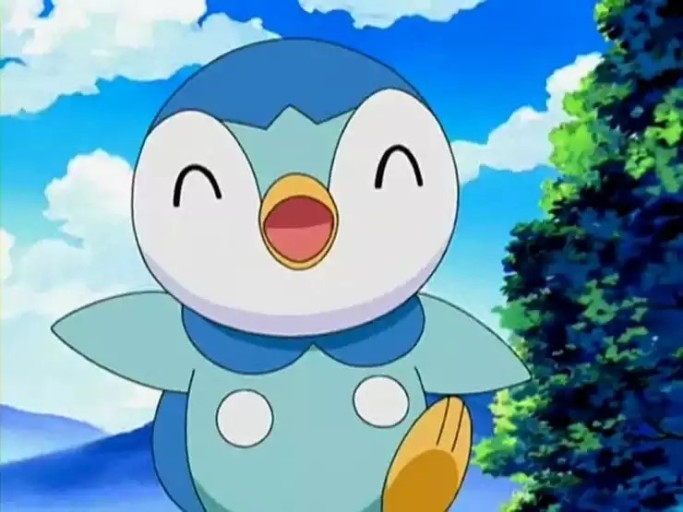


# 목차
##STEP.1 데이터전처리


(1) 포켓몬스터 데이터 불러오기


(2) 데이터 복사 변수명 'pokemon' 사용


(3) 필요한 모듈 불러오기


(4) 데이터 전처리 : 과정(1) 이름의 길이가 10 이상인가?


(5) 데이터 전처리 : 과정(2) 이름에 자주 쓰이는 토큰 추출


(6) 데이터 전처리 : 과정(3) Type1 & 2! 범주형 데이터 전처리




##STEP.2 기본 모델 학습 및 성능분석


(1) 원본데이터 보존 확인


(2) 원본 피쳐가운데 유의미한 데이터만 추출 , 타겟설정


(3) 모델에 학습할 원본데이터 집어넣기


(4) 학습데이터 - 테스트 데이터 분리


(5) 분류 모델 의사 결정 트리(decision tree)를 사용 및 훈련


(6) 결과 평가




##STEP.3 베이스라인 모델 학습 및 성능분석


(1) 기존에 전처리한 데이터로 모델 재학습을 위한 준비


(2) 모델 학습을 위한 데이터 준비 및 변수명 지정


(3) 훈련데이터 - 테스트 데이터 분리


(4) 전처리한 데이터를 이용한 의사결정나무 모델 훈련


(5) 결과 평가




##STEP.4 비교 모델 학습 및 비교 분석


(1) 랜덤포레스트로 모델 결정


(2) 모델 훈련 및 학습


(3) 모델 평가




##STEP.5 회고 및 제출


(1) 느낀점


(2) 요약 및 참고자료

## 데이터 전처리

In [6]:
#포켓몬스터 데이터파일 불러오기

file_path = "/content/drive/MyDrive/Colab Notebooks/Pokemon.csv"
original_data = pd.read_csv(file_path)
original_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
#혹시 모르니 원본데이터 놔두고 데이터 복사 변수명 'pokemon' 사용

pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
#필요한 모듈 불러오기

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
'''
타겟으로 두고 확인할 데이터는 Legendary (전설의 포켓몬인지 아닌지의 여부)이므로,
Legendary == True 값을 가지는 레전드 포켓몬 데이터셋은 legendary 변수에,
Legendary == False 값을 가지는 일반 포켓몬 데이터셋은 ordinary 변수에 저장해두겠습니다.
'''

# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)

# 일반 포켓몬 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)

(65, 13)
(735, 13)


In [10]:
#데이터 전처리 : 과정(1) 이름의 길이가 10 이상인가?
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


In [11]:
#데이터 전처리 : 과정(2) 이름에 자주 쓰이는 토큰 추출
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())

pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [12]:
#이름에 특수문자 들어가있는 포켓몬을 확인하고 수동수정.
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [13]:
#모든 이름이 알파벳으로만 이루어졌음을 확인 (name_isalpha 컬럼이 False인 컬럼이 하나도 없음.)
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


In [14]:
# 이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기
import re
def tokenize(name):
    tokens = []
    a = re.findall('[A-Z][a-z]*', name)
    tokens.extend(a)

    return np.array(tokens)
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [15]:
#문자열로 구성된 이름을 전처리를 통해 True, False의 부울 데이터로 변환
from collections import Counter
most_common = Counter(token_set).most_common(10)
most_common

for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


In [16]:
#데이터 전처리 : 과정(3) Type1 & 2! 범주형 데이터 전처리
#18가지의 모든 Type를 모두 원-핫 인코딩(One-Hot Encoding)합니다.
#두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 합니다.

types = list(set(pokemon["Type 1"]))
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Flying,Ice,Water,Steel,Ghost,Electric,Ground,Fire,Fighting,Fairy,Psychic,Rock,Dragon,Normal,Poison,Bug,Grass,Dark
0,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
2,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,Fire,NaN,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


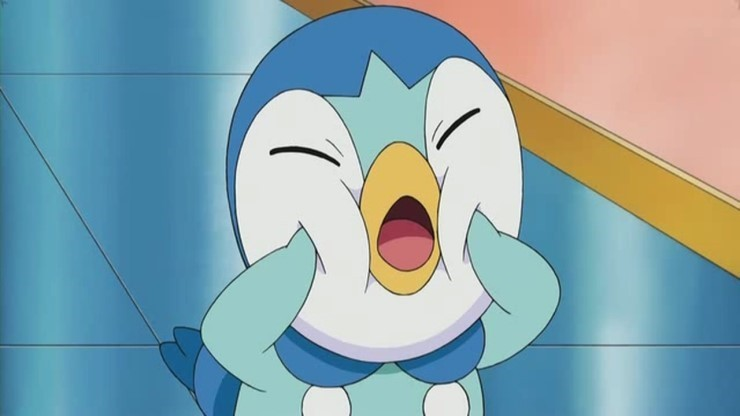

# 기본 모델 학습 및 성능분석

In [17]:
# 원본데이터 보존 확인

print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [18]:
# 원본데이터 컬럼확인

original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [19]:
#원본 피쳐가운데 유의미한 데이터만 추출 , 타겟설정

features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
target = 'Legendary'

In [20]:
# 모델에 학습할 원본데이터 집어넣기

X = original_data[features]

print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [21]:
#모델에 타겟 원본데이터 집어넣기

y = original_data[target]

print(y.shape)
y.head()

(800,)


,Legendary
0,False
1,False
2,False
3,False
4,False


In [22]:
# 학습데이터 - 테스트 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [23]:
#분류 모델 의사 결정 트리(decision tree)를 사용 및 훈련

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
#결과 평가
'''
TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우입니다.
FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우입니다.
FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우입니다.
TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우입니다.
'''

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

정확도는 전체 데이터 중 맞은 데이터의 개수에 대한 비율이므로 152 / 160 * 100 = 95% 입니다.
그러나 우리는 전설의 포켓몬스터가 소량으로 들어있는 불균형 데이터이기 때문에  아무런 학습을 안 하고 모든 답을 하나로 찍어도, 735 / 800 * 100 = 92%의 정확도를 달성할 수 있습니다.
따라서 이번 데이터셋에서는 정확도로 모델의 성능을 평가하는 것은 거의 의미가 없으며 ,결과에 대한 평가이므로 다른방식으로 재평가가 필요합니다.

In [25]:
#정확도가 아닌 recall값을 척도로 모델평가 재수립

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



원본데이터로 학습한 모델에 대한 recall 값 0.62로 낮은수치를 보임.

# 베이스라인 모델 학습 및 성능분석

In [26]:
#기존에 전처리한 데이터로 모델 재학습을 위한 준비
#전처리한 데이터의 컬럼 종류 확인

print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Flying', 'Ice', 'Water', 'Steel', 'Ghost', 'Electric', 'Ground',
       'Fire', 'Fighting', 'Fairy', 'Psychic', 'Rock', 'Dragon', 'Normal',
       'Poison', 'Bug', 'Grass', 'Dark'],
      dtype='object')


In [27]:
#전처리한 데이터 피쳐에서 원본데이터와 같이 유의미한 데이터만 수동추출하여 변수명 지정

features1 = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features1)

38

In [28]:
#타겟 설정
target1 = "Legendary"
target1

'Legendary'

In [30]:
#모델 학습을 위한 데이터 준비 및 변수명 지정

X1 = pokemon[features1]
print(X1.shape)
X1.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [31]:
#모델 타켓 준비 및 변수명 지정

y1 = pokemon[target1]
print(y1.shape)
y1.head()

(800,)


,Legendary
0,False
1,False
2,False
3,False
4,False


In [32]:
#훈련데이터 - 테스트 데이터 분리
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=15)

print(X1_train.shape, y1_train.shape)
print(X1_test.shape, y1_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [38]:
#전처리한 데이터를 이용한 의사결정나무 모델 훈련

model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)

In [39]:
#결과평가

confusion_matrix(y1_test, y1_pred)
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



# 비교 모델 학습 및 비교 분석

In [40]:
#필요한 모듈 불러오기

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [44]:
#데이터 준비 (X: 입력 데이터, y: 타겟 데이터)

X1 = pokemon[features1]
y1 = pokemon[target1]

In [45]:
#데이터 분할

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=15)

In [62]:
#모델 생성 및 학습

rf_model = RandomForestClassifier(random_state=15, n_estimators=100)
rf_model.fit(X1_train, y1_train)

RandomForestClassifier(random_state=15)

In [63]:
#예측

y1_pred = rf_model.predict(X1_test)
print("Random Forest Model")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("Classification Report:")
print(classification_report(y1_test, y1_pred))

Random Forest Model
Accuracy: 0.9625
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       147
        True       0.73      0.85      0.79        13

    accuracy                           0.96       160
   macro avg       0.86      0.91      0.88       160
weighted avg       0.97      0.96      0.96       160



의사결정나무의 비교 대상으로 랜덤포레스트를 선택하였습니다.


그러나 평가 결과 정확도는 97%로 높게 나왔지만 리콜값이 의사결정나무보다 낮게 나왔습니다. 예상했던결과와 다르게 랜덤포레스트의 리콜 값이 낮게 나왔기 때문에 의문이 들었습니다. 왜냐하면 랜덤포레스트는 의사결정나무의 집합체이고 다수결의 원칙으로 의사가 결정되고 그로인해 정답률이 더 높을 것이라고 예상되었기 때문입니다. .
그러한 이유에 대해서 알아본 결과는 아래와 같았습니다.

1. 랜덤 포레스트의 클래스 불균형 처리
2. 의사결정나무의 과적합 문제
3. 데이터 분포와 특성의 영향
4. 리콜 외 다른 성능 지표 확인 필요

리콜 값이 높은 이유는 클래스 불균형, 과적합, 또는 모델 특성 때문일 가능성이 크다고 결론을 내렸습니다.

# 회고 및 제출

### 회고:

긴시간을 통해서 배운 케창딥 내용을 총 복습할 수 있는 시간이었다고 생각합니다.
저에게 친숙한 포켓몬스터를 통해서 데이터를 전처리하고 스케일링하는 과정이 생각보다 즐거웠습니다. 그러나 노드를 따라서 학습하지 않았다면 매우 어려웠을 것입니다.
모델 학습을 시키는 과정 중 정확한 지표를 설정하는것이 매우 중요하다는것이 흥미로웠습니다.


오늘날씨 맑음.

### 요약 및 참고자료

포켓몬스터 데이터셋 불러오기

데이터전처리하기

기본데이터 모델학습하기

베이스라인 모델학습하기

비교모델 학습 및 비교하기

참고자료 : 아이펠 캠퍼스 , 쳇지피티

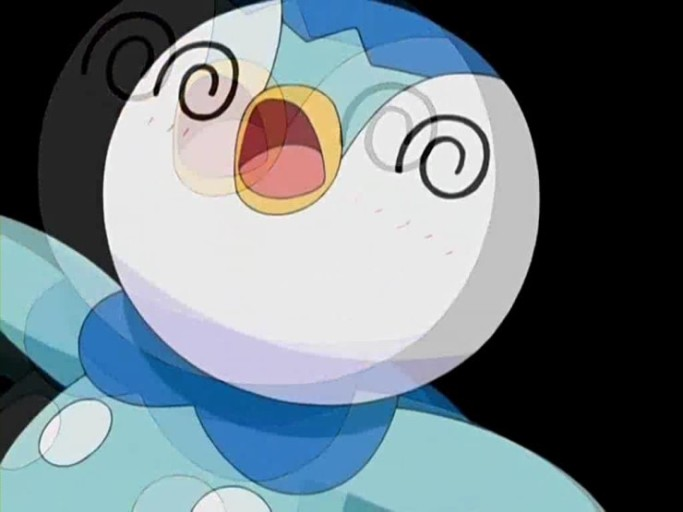